<a href="https://colab.research.google.com/github/adelphim/dsnp/blob/main/awd%20DSPN%204%200%20P1%20Analisando%20os%20Dados%20do%20Airbnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 4.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*

---

# Análise dos Dados do Airbnb - *Barcelona*

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade BARCELONA, e ver quais insights podem ser extraídos a partir de dados brutos.**

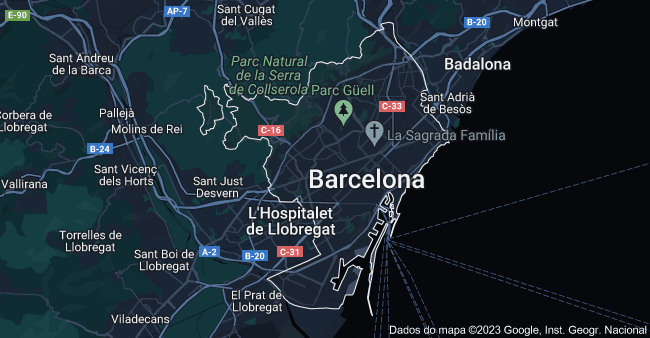

## Obtenção dos Dados


In [ ]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [ ]:
# importar o arquivo listings.csv para um DataFrame

DATA_PATH = "http://data.insideairbnb.com/spain/catalonia/barcelona/2023-06-10/visualisations/listings.csv"

df = pd.read_csv(DATA_PATH)

## Análise dos Dados


In [ ]:
df.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                            object
dtype: object

**Dicionário das variáveis**

* `id`: número para identificação do anúncio
* `name`: nome do anúncio
* `host_id`: número para identificação de quem está alugando
* `host_name`: nome para identificação de quem está alugando
* `neighbourhood_group`: ⁉
* `neighbourhood`: nome do bairro
* `latitude`: coordenada geográfica do imóvel
* `longitude`: coordenada geográfica do imóvel
* `room_type`: tipo do imóvel
* `price`: preço de anúncio do imóvel
* `minimum_nights`: quantidade de noites minimas para aluguel
* `number_of_reviews`: quantidade de resenhas
* `last_review`: data a ultima resenha
* `reviews_per_month`: quantidade de resenhas por mês
* `calculated_host_listings_count`: quantidade de de quem está aalugando
* `availability_365`: quantidade de dias disponpíveis para alocação no ano
* `number_of_reviews_ltm`: quantidad de resenhas que o anuncio tem nos 12 ultimos meses
* `license`: identificação unica da reserva

Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [ ]:
df.info()

In [ ]:
df.shape

In [ ]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,1.723000e+04,1.723000e+04,17230.000000,17230.000000,17230.000000,17230.000000,17230.000000,13198.000000,17230.000000,17230.000000,17230.000000
mean,2.452457e+17,1.577106e+08,41.391854,2.167149,177.689959,14.375218,42.310215,1.438544,28.073244,172.454208,11.988799
std,3.583623e+17,1.652453e+08,0.013882,0.017245,876.724391,33.905670,83.509961,1.839384,53.164134,124.998430,23.295948
min,1.867400e+04,3.073000e+03,41.352608,2.091590,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000
25%,2.043217e+07,9.536735e+06,41.381040,2.157150,55.000000,1.000000,1.000000,0.230000,1.000000,56.000000,0.000000
50%,4.215769e+07,8.489767e+07,41.389566,2.168260,111.000000,3.000000,7.000000,0.870000,5.000000,171.000000,2.000000
75%,6.601314e+17,2.871165e+08,41.401190,2.177500,214.000000,31.000000,43.000000,2.100000,25.000000,293.000000,16.000000
max,9.100075e+17,5.185810e+08,41.459560,2.227710,90000.000000,1125.000000,1751.000000,50.640000,265.000000,365.000000,768.000000


In [ ]:
# mostrar as 5 primeiras entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,18674,Rental unit in Barcelona · ★4.35 · 3 bedrooms ...,71615,Mireia And Maria,Eixample,la Sagrada Família,41.405560,2.172620,Entire home/apt,210,1,35,2023-04-07,0.29,28,18,8,HUTB-002062
1,23197,Rental unit in Sant Adria de Besos · ★4.77 · 3...,90417,Etain (Marnie),Sant Martí,el Besòs i el Maresme,41.412907,2.220633,Entire home/apt,250,4,72,2023-05-29,0.48,2,185,13,HUTB005057
2,41952,Rental unit in Barcelona · ★4.35 · 2 bedrooms ...,183340,Teresa,Gràcia,el Camp d'en Grassot i Gràcia Nova,41.405680,2.169430,Entire home/apt,172,3,66,2023-05-26,0.49,5,269,22,HUTB-003549
3,32711,Rental unit in Barcelona · ★4.43 · 2 bedrooms ...,135703,Nick,Gràcia,el Camp d'en Grassot i Gràcia Nova,41.405660,2.170150,Entire home/apt,186,2,91,2023-03-22,0.63,3,256,24,HUTB-001722
4,46153,Rental unit in Barcelona · ★4.20 · 2 bedrooms ...,90417,Etain (Marnie),Ciutat Vella,"Sant Pere, Santa Caterina i la Ribera",41.389560,2.177590,Entire home/apt,63,31,5,2022-07-31,0.03,2,176,1,Exempt


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

In [ ]:
# identificar o volume de dados do DataFrame
print(f'Entradas(linhas): {df.shape[0]}')
print(f'Variáveis(colunas): {df.shape[1]}')
print('\n--- Tipo das variáveis ---\n')
# verificar os tipos das variáveis
display(df.dtypes)

Entradas(linhas): 17230
Variáveis(colunas): 18

--- Tipo das variáveis ---



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                            object
dtype: object

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

* A coluna `Licence` possui 48,56% de valores nulos
* Colunas `reviews_per_month` e `last_review` possuem 23,40% de valores nulos
* As demais colunas os valores são 0 ou proximo de 0

*Observação*: Esses dados nulos não são relevantes para as analises subsequentes

In [ ]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
df.isnull().sum()

In [ ]:
df.isnull().sum() / df.shape[0]

In [ ]:
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

license                           0.485665
reviews_per_month                 0.234010
last_review                       0.234010
host_name                         0.000116
minimum_nights                    0.000000
number_of_reviews_ltm             0.000000
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
id                                0.000000
name                              0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
neighbourhood_group               0.000000
host_id                           0.000000
price                             0.000000
dtype: float64

### **Q3. Qual o tipo de distribuição das variáveis?**

array([[<Axes: title={'center': 'id'}>,
        <Axes: title={'center': 'host_id'}>,
        <Axes: title={'center': 'latitude'}>],
       [<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'minimum_nights'}>],
       [<Axes: title={'center': 'number_of_reviews'}>,
        <Axes: title={'center': 'reviews_per_month'}>,
        <Axes: title={'center': 'calculated_host_listings_count'}>],
       [<Axes: title={'center': 'availability_365'}>,
        <Axes: title={'center': 'number_of_reviews_ltm'}>, <Axes: >]],
      dtype=object)

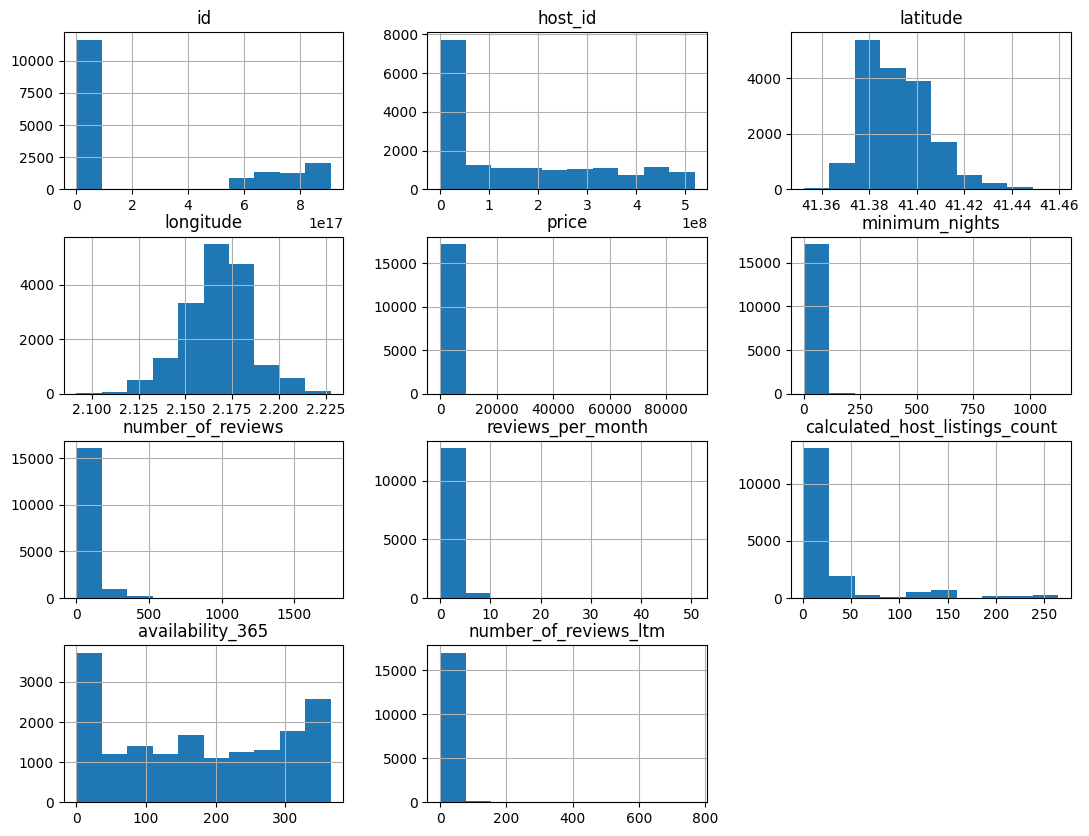

In [ ]:
# plotar o histograma das variáveis numéricas
df.hist(figsize=(13,10), bins=10)

As variáveis `price`, `minimum_nights` possuem presença de outliers.

In [ ]:
df[['price', 'minimum_nights','calculated_host_listings_count','availability_365','number_of_reviews_ltm']].describe()

,price,minimum_nights,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,17230.000000,17230.000000,17230.000000,17230.000000,17230.000000
mean,177.689959,14.375218,28.073244,172.454208,11.988799
std,876.724391,33.905670,53.164134,124.998430,23.295948
min,0.000000,1.000000,1.000000,0.000000,0.000000
25%,55.000000,1.000000,1.000000,56.000000,0.000000
50%,111.000000,3.000000,5.000000,171.000000,2.000000
75%,214.000000,31.000000,25.000000,293.000000,16.000000
max,90000.000000,1125.000000,265.000000,365.000000,768.000000


#### Boxplot para minimum_nights

Barcelona é um local de bastante intercâmbio e por isso escolhido um período minimo de 90 dias `(0.58%)`.

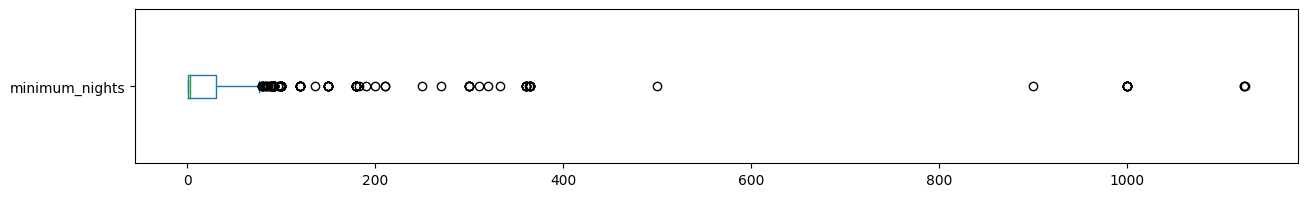

minimum_nights: valores acima de 90:
100 entradas
0.5804%


In [ ]:
df.minimum_nights.plot(kind='box', vert=False, figsize=(15, 2))
plt.show()

args1 = 90
# ver quantidade de valores acima de 90 dias para minimum_nights
print(f"minimum_nights: valores acima de {args1}:")
print("{} entradas".format(len(df[df.minimum_nights > args])))
print("{:.4f}%".format((len(df[df.minimum_nights > args]) / df.shape[0])*100))

#### Boxplot para price

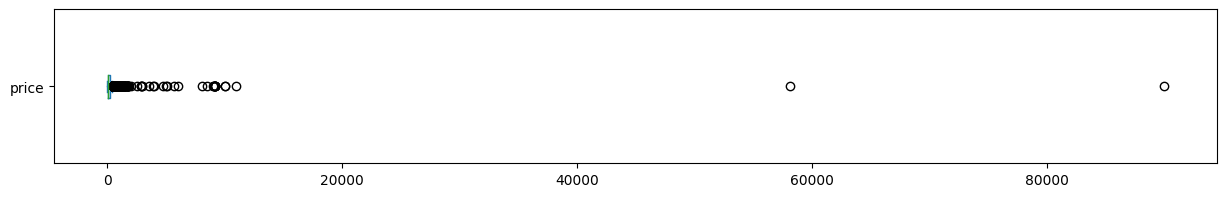


price: valores acima de 700
268 entradas
1.5554%


In [ ]:
df.price.plot(kind='box', vert=False, figsize=(15, 2))
plt.show()

args2 = 700
print(f"\nprice: valores acima de {args2}")
print("{} entradas".format(len(df[df.price > args2])))
print("{:.4f}%".format((len(df[df.price > args2]) / df.shape[0])*100))


In [ ]:
# criando outro DataFrame para realizar a limpeza dos Outliers
df_clean = df.copy()

In [ ]:
# removendo os outliers
df_clean.drop(df_clean[df_clean.minimum_nights > 90].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.price > 700].index, axis=0, inplace=True)

# removendo o `neighbourhood_group`, valores nulos
df_clean.drop('neighbourhood_group', axis=1, inplace=True)

array([[<Axes: title={'center': 'id'}>,
        <Axes: title={'center': 'host_id'}>,
        <Axes: title={'center': 'latitude'}>],
       [<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'minimum_nights'}>],
       [<Axes: title={'center': 'number_of_reviews'}>,
        <Axes: title={'center': 'reviews_per_month'}>,
        <Axes: title={'center': 'calculated_host_listings_count'}>],
       [<Axes: title={'center': 'availability_365'}>,
        <Axes: title={'center': 'number_of_reviews_ltm'}>, <Axes: >]],
      dtype=object)

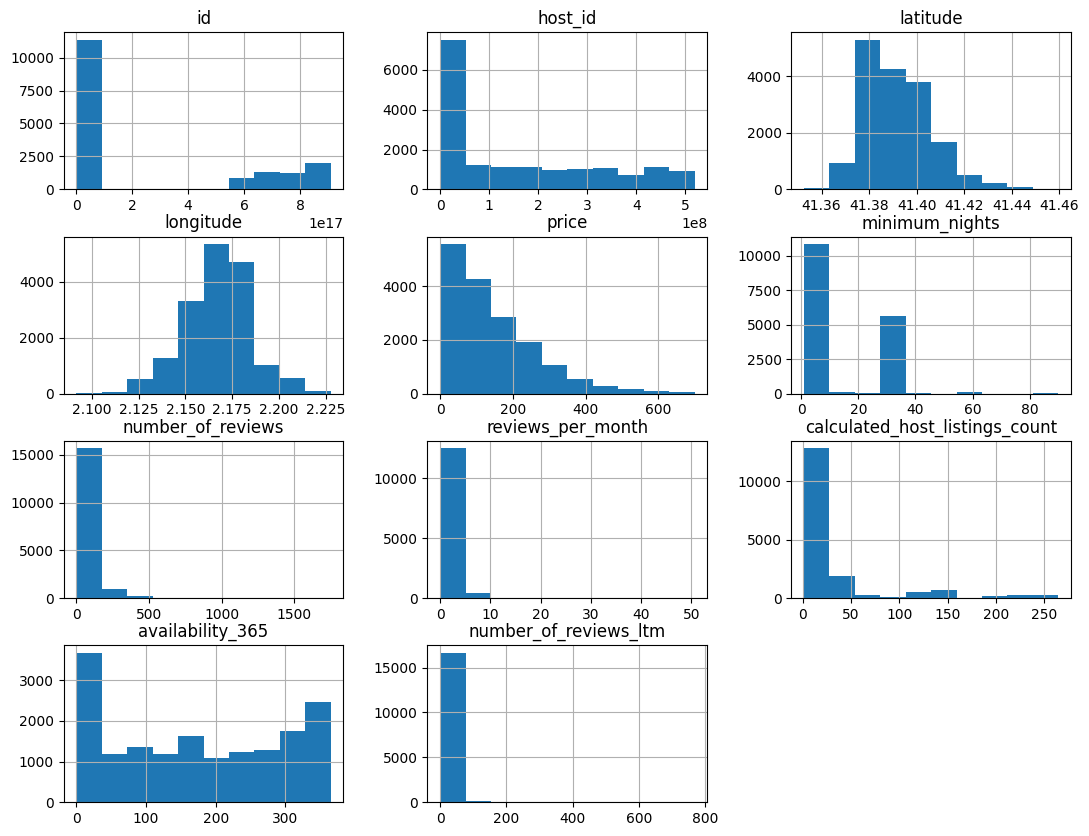

In [ ]:
# plotar o histograma das variáveis numéricas
df_clean.hist(figsize=(13,10), bins=10)

### **Q4. Qual a média dos preços de aluguel?**

In [ ]:
df_clean[['price', 'minimum_nights','calculated_host_listings_count','availability_365','number_of_reviews_ltm']].describe()

,price,minimum_nights,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,16871.000000,16871.000000,16871.000000,16871.000000,16871.000000
mean,147.181495,12.914054,27.849920,171.633157,12.077767
std,119.891504,15.354089,52.964459,124.823669,23.444697
min,0.000000,1.000000,1.000000,0.000000,0.000000
25%,55.000000,1.000000,1.000000,54.000000,0.000000
50%,110.000000,3.000000,5.000000,170.000000,2.000000
75%,208.000000,31.000000,25.000000,292.000000,16.000000
max,700.000000,90.000000,265.000000,365.000000,768.000000


In [ ]:
# ver a média da coluna `price``
df_clean.price.mean()

147.18149487285876

In [ ]:
df_clean['price'].mean()

147.18149487285876

### **Q4. Qual a correlação existente entre as variáveis**

In [ ]:
# criar uma matriz de correlação
correlacao = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].corr()


# mostrar a matriz de correlação

display(correlacao)


,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,-0.368288,0.178607,0.109099,0.129112,0.167276
minimum_nights,-0.368288,1.000000,-0.225407,-0.278879,0.082756,0.170851
number_of_reviews,0.178607,-0.225407,1.000000,0.512011,-0.119119,0.018479
reviews_per_month,0.109099,-0.278879,0.512011,1.000000,-0.043221,0.105209
calculated_host_listings_count,0.129112,0.082756,-0.119119,-0.043221,1.000000,0.206654
availability_365,0.167276,0.170851,0.018479,0.105209,0.206654,1.000000


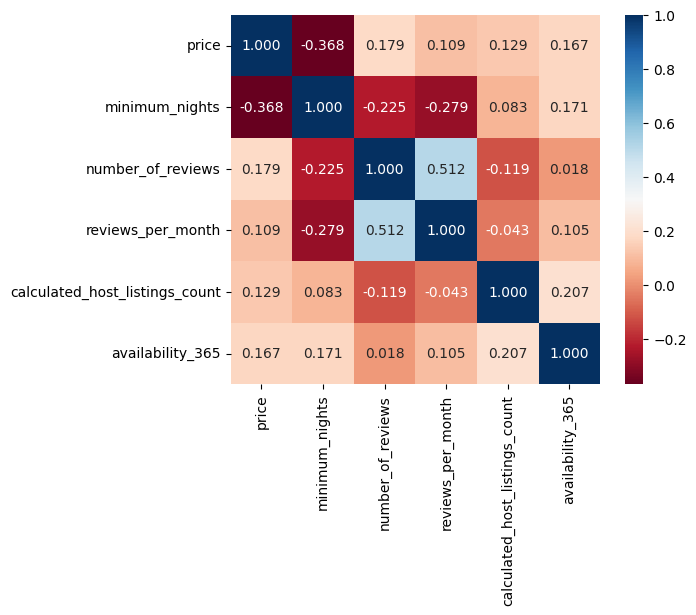

In [ ]:
# plotar um heatmap a partir das correlações
sns.heatmap(correlacao, cmap='RdBu', fmt='.3f', square=True, linecolor='w', annot=True);

### **Q5. Qual o tipo de imóvel mais alugado no Airbnb?**

In [ ]:
# mostrar a quantidade de cada tipo de imóvel disponível
df_clean.room_type.value_counts()

Entire home/apt    9976
Private room       6606
Shared room         148
Hotel room          141
Name: room_type, dtype: int64

In [ ]:
# mostrar a porcentagem de cada tipo de imóvel disponível
(df_clean.room_type.value_counts() / df_clean.shape[0]) * 100

Entire home/apt    59.131053
Private room       39.155948
Shared room         0.877245
Hotel room          0.835754
Name: room_type, dtype: float64

### **Q6. Qual a localidade mais cara do dataset?**

A localidade mais cara é `la Vila Olímpica del Poblenou` com o Preço Médio de `218.65 Euros`.
O bairro la **Marina del Prat Vermell** deve ser desconsiderado do TOP10🔝 por
não representar uma quantidade significativa de *Entradas* em relação aos *demais*.
:

In [ ]:
# ver preços por bairros, na média
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]

neighbourhood
la Vila Olímpica del Poblenou                   218.656716
Diagonal Mar i el Front Marítim del Poblenou    210.453782
la Dreta de l'Eixample                          210.173113
la Marina del Prat Vermell                      190.111111
l'Antiga Esquerra de l'Eixample                 172.819588
el Fort Pienc                                   167.917864
Sant Antoni                                     165.374118
la Sagrada Família                              163.533264
les Corts                                       157.073529
Sant Gervasi - Galvany                          152.728774
Name: price, dtype: float64

In [ ]:
display(df_clean[df_clean.neighbourhood == 'la Vila Olímpica del Poblenou'].shape)
display(df_clean[df_clean.neighbourhood == 'Diagonal Mar i el Front Marítim del Poblenou'].shape)
display(df_clean[df_clean.neighbourhood == "la Dreta de l'Eixample"].shape)
display(df_clean[df_clean.neighbourhood == 'la Marina del Prat Vermell'].shape)
display(df_clean[df_clean.neighbourhood == "l'Antiga Esquerra de l'Eixample"].shape)
display(df_clean[df_clean.neighbourhood == "el Fort Pienc"].shape)
display(df_clean[df_clean.neighbourhood == "Sant Antoni"].shape)
display(df_clean[df_clean.neighbourhood == "la Sagrada Família"].shape)
display(df_clean[df_clean.neighbourhood == "les Corts"].shape)
display(df_clean[df_clean.neighbourhood == "Sant Gervasi - Galvany"].shape)

(134, 17)

(119, 17)

(2120, 17)

(9, 17)

(970, 17)

(487, 17)

(850, 17)

(962, 17)

(204, 17)

(424, 17)

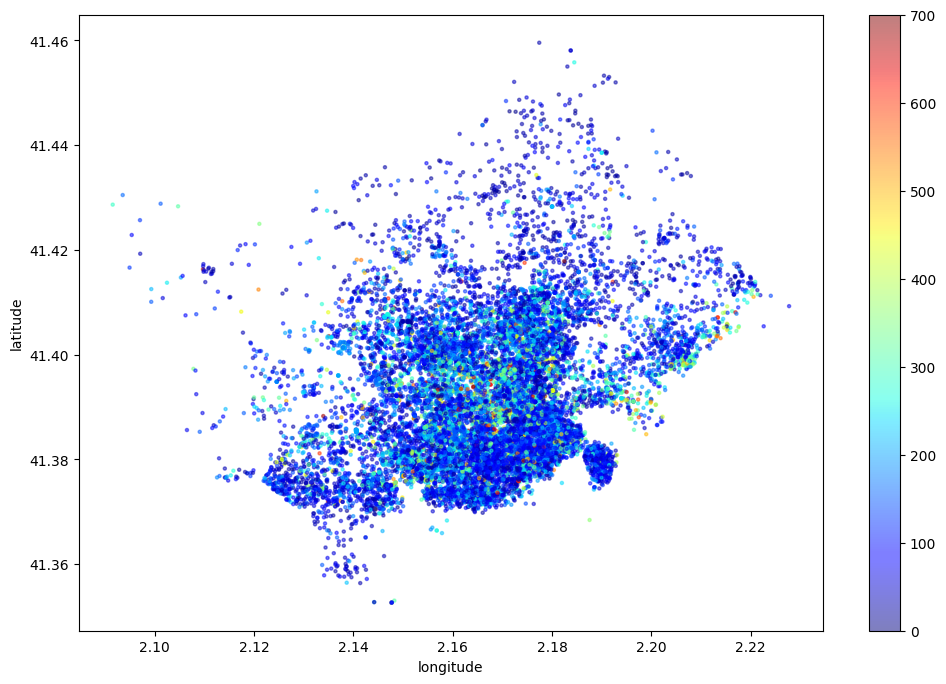

In [ ]:
# plotar os imóveis pela latitude-longitude
df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.5, c=df_clean['price'], s=5,
              cmap=plt.get_cmap('jet'), figsize=(12,8));


### **Q7. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

In [ ]:
# ver a média da coluna `minimum_nights
df_clean.minimum_nights.mean()

12.914053701618162

## Conclusões



A cidade de Barcelona é um bom lugar para viajar, realizar intercâmbio e trablhos sazonais. Dessa maneira, segue alguns direcionamentos baseado nos dados alizados acima.


*   A base de dados possuim um total de `17230` **Entradas** e `18` **Variáveis**
*   O valor médio do aluguel é de `€ 147,18`
*   Os tipos de imóveis mais alugados são o **Entire home/apt** com `59,13%` e **Private room** com `39,15%`. Os demais **Shared room** e **Hotel room** são inferiores a `1%`.
*   As cidades `la Vila Olímpica del Poblenou`, `Diagonal Mar i el Front Marítim del Poblenou` e `la Dreta de l'Eixample` estão dentre as mais caras.
*   A cidade `la Dreta de l'Eixample` é a que possui maior oportunidade de imóveis para locação.
*   Item da lista

